# This notebook presents a function that generates a skew-normal probability distribution for ten snow depth bins (0m - 1m) based on the mean snow depth value, following Mallett et al. (2022; J. Glac).

In [1]:
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

# These are the statistics of the skew-normal distribution per the paper

statistics = {'a': 2.542562886886376,
  'loc': -1.114525560819975,
  'scale': 1.4973819434202296,
  'CV': 0.41696167189340216,
             }

In [2]:
# These are essential functions that generate the skew-normal distribution based on the mean depth.

# Call these once at the beginning of your code.

def get_std_from_mean(mean_depth, CV):
    std = mean_depth * CV
    return (std)

def depth_distribution_from_mean_depth_and_edges(mean_depth, dep_bin_edges, statistics):
    dep_bin_centres = dep_bin_edges[:-1] + (dep_bin_edges[1] - dep_bin_edges[0]) / 2

    std = get_std_from_mean(mean_depth, statistics['CV'])

    std_bin_edges = (dep_bin_edges - mean_depth) / std
    std_bin_centres = std_bin_edges[:-1] + (std_bin_edges[1] - std_bin_edges[0]) / 2
    std_bw = np.nanmean(np.diff(std_bin_edges))

    fit = skewnorm.pdf(std_bin_centres,
                       statistics['a'],
                       statistics['loc'],
                       statistics['scale']) * std_bw

    return (dep_bin_centres, fit)


## Below is the function you asked for. It calls the functions above, and returns the 10 probabilities for the 10 snow depth bins based on your given mean snow depth. It also returns the centres of the bins for easy plotting and sanity checking. All units are in meters.

## Currently I've set the number of bins to 10, and max depth to 1m. But you can change the max depth to something like three times the mean depth etc, see examples below.

In [3]:
def make_depth_dist(mean_depth,
                    n_bins = 10,
                    max_depth = 1.0):


    bin_edges = np.linspace(0,max_depth,n_bins+1)
    bin_width = np.diff(bin_edges)[0]

    bin_centres, probabilities = depth_distribution_from_mean_depth_and_edges(mean_depth,bin_edges,statistics)

    return (bin_centres, probabilities)

# Here's an example of how to call the function - just specify the mean depth. I've chosen 0.3 m here.

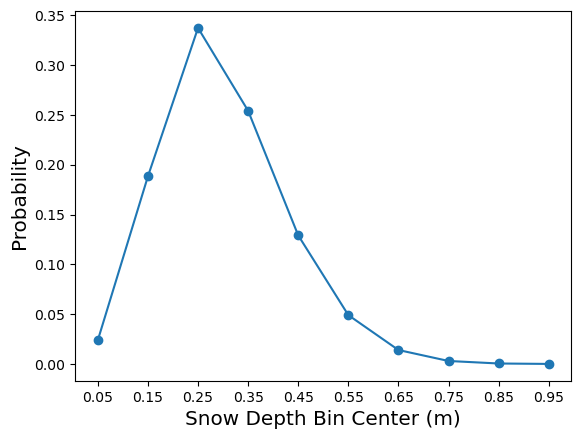

In [4]:
bin_centres, probabilities = make_depth_dist(mean_depth=0.3)

# Code below plots the output

plt.plot(bin_centres,probabilities,marker='o')
plt.ylabel('Probability',fontsize='x-large')
plt.xlabel('Snow Depth Bin Center (m)',fontsize='x-large')
plt.xticks(bin_centres)
plt.show()

# Another example where I've set the max depth to three times the mean depth.

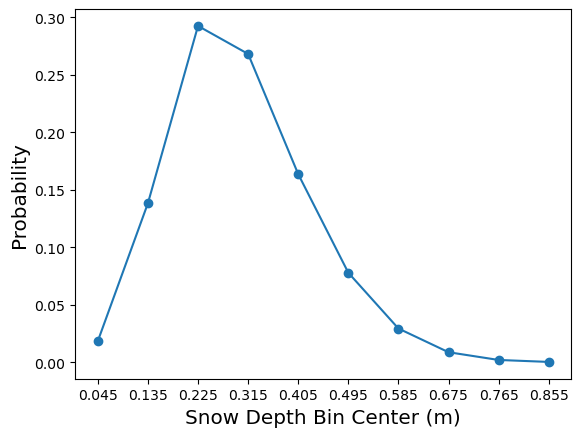

In [5]:
bin_centres, probabilities = make_depth_dist(mean_depth=0.3,max_depth=3*0.3)


plt.plot(bin_centres,probabilities,marker='o')
plt.ylabel('Probability',fontsize='x-large')
plt.xlabel('Snow Depth Bin Center (m)',fontsize='x-large')
plt.xticks(bin_centres)
plt.show()

# Another example where I've used 20 bins instead of 10

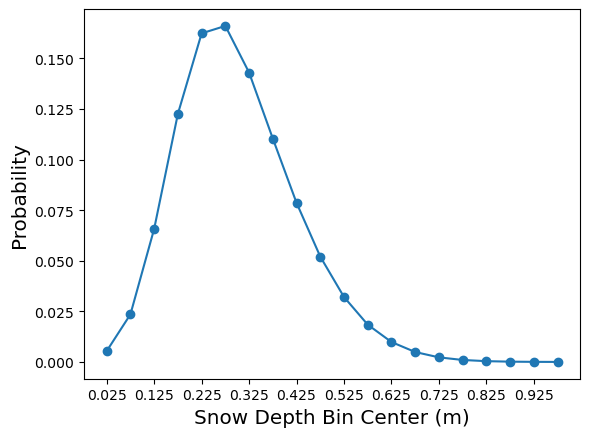

In [6]:
bin_centres, probabilities = make_depth_dist(mean_depth=0.3,n_bins=20)


plt.plot(bin_centres,probabilities,marker='o')
plt.ylabel('Probability',fontsize='x-large')
plt.xlabel('Snow Depth Bin Center (m)',fontsize='x-large')
plt.xticks(bin_centres[::2])
plt.show()

# As a double-check, you can periodically sum the probabilities to make sure that they add to (almost) 1. 

### (It will never be exactly one because we're setting a finite range of depths)

In [7]:
np.sum(probabilities)

0.9991558815400892

# Now do an example where a snow depth distribution is made for each of a 361 x 361 grid.

## FIrst make a grid of random "snow depths"

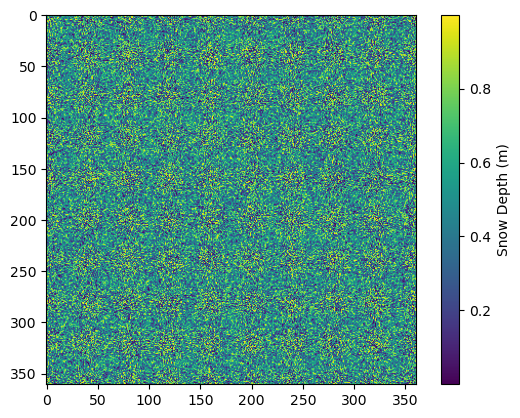

In [25]:
n_i, n_j = 361, 361

# Seeds the random number generator so it produces a consistent array
np.random.seed(10)

# Generate a fake grid of snow depths similar to SnowModel-LG depths
fake_snow_depths = np.random.rand(n_i, n_j)

# Plot the fake snow depth grid
plt.imshow(fake_snow_depths)
plt.colorbar(label='Snow Depth (m)')
plt.show()

In [30]:
%%timeit #This just times the execution of the jupyter notebook cell

# Makes an empty array of nans to fill with the snow depth bin probabilities
snow_depth_probabilities = np.full((361,361,10), np.nan) 

# Makes an empty array of nans to fill with the snow depth bin definitions
snow_depth_bin_centers = np.full((361,361,10), np.nan)

# Iterate through all the snow depths in the 361x361 grid
for i in range(n_i):
    for j in range(n_j):
        
        # Get the snow depth in the grid cell
        
        snow_depth = fake_snow_depths[i,j]
        
        # Call the distribution function
        
        bin_centers, probabilities = make_depth_dist(snow_depth,
                                                        n_bins = 10,
                                                        max_depth = 3*snow_depth)
        
        # Save the snow depth bins and their probabilities
        
        snow_depth_probabilities[i,j,:] = probabilities
        snow_depth_bin_centers[i,j,:] = bin_centers

27.9 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
